
latihan yang dipelajari meliputi:
    1. preprocessing
    2. load gambar dalam sebuah folder 
    3. spliting dataset train test
    4. klasifikasi model evaluasi
    5. Find best parameter

# preprocessing

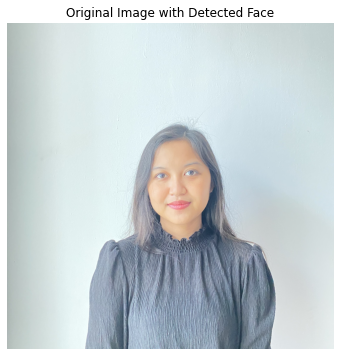

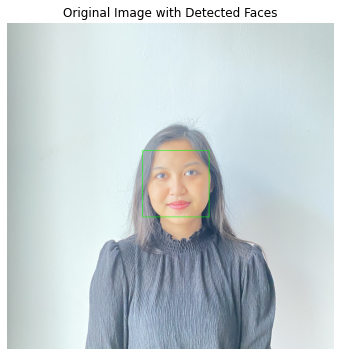

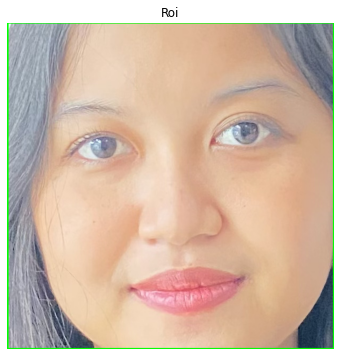

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the input image
img_path = '../dataset/Kirei/IMG_5058.jpg'
img = cv2.imread(img_path)

# Convert the image to grayscale (required for face detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image using the face_cascade
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)

# Show the original image with the detected face
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Face')
plt.axis('off')
plt.show()


# Draw bounding boxes around the detected faces and display the image
for (x, y, w, h) in faces:
    # Draw a rectangle around the detected face
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    face_roi = img[y:y+h, x:x+w]

    # Show the original image with the detected faces and bounding boxes
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image with Detected Faces')
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
    plt.title('Roi')
    plt.axis('off')
    plt.show()


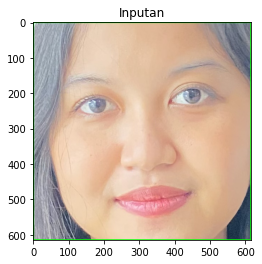

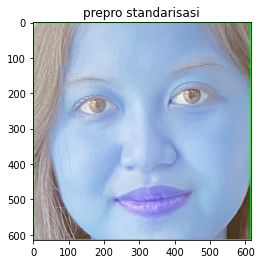

In [2]:
#image preprocessing
import cv2
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np

# img=cv2.imread('../dataset/Kirei/IMG_5058.jpg') #baca file gambar dari direktori dengan menggunakan open cv
img = face_roi
#plt digunakan untuk menampilkan plot / gambar
plt.figure()
plt.title("Inputan")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #menampilkan gambar
plt.show() #menampilkan plot

convert = img/255.0
plt.figure()
plt.title("prepro standarisasi") #membuat judul pada plot
plt.imshow(convert) #menampilkan gambar
plt.show()

train sendiri objek baru
https://amin-ahmadi.com/cascade-trainer-gui/

plt digunakan untuk membuat plot gambar <br>
cv2 perintah open cv untuk gambar

## membaca data dan memberi label

In [3]:
def haar(img):
    status = False
    face_roi = []
    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_roi = img[y:y+h, x:x+w]
        status = True
    return status,face_roi

In [4]:
#menentukan direktori/folder data citra yang akan dibuka
dirname = '../dataset/'  

#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)

#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data= [] 
tampungan_label=[]
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))  #baca path data
        if (img_path.endswith("jpg")): #dengan file berekstensi jpg
            img = cv2.imread(img_path) #baca gambar
            
            path_parts = path.split('/')
            # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
            last_word = path_parts[-1]
            #preprocessing data / segentasi  boleh dilakukan disini
            status, gambar_haar = haar(img)
            if(status):
                resized=cv2.resize(gambar_haar,dim, interpolation=cv2.INTER_LINEAR) #resize
                tampungan_data.append(resized/255.0) #menumpuk gambar blur pada array tampungan dan di sampling
                tampungan_label.append(last_word)
    X = np.array(tampungan_data) 
    y = np.array(tampungan_label) 

../dataset/
../dataset/Putri
../dataset/Yudha
../dataset/Kirei


{'Kirei': 0, 'Putri': 1, 'Yudha': 2}


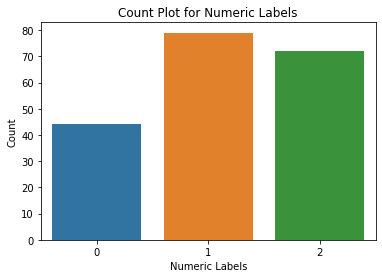

In [5]:
import seaborn as sns
list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(label_dict)
label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)

# Visualisasikan dalam jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()

## Tampilkan data hasil preprocessing

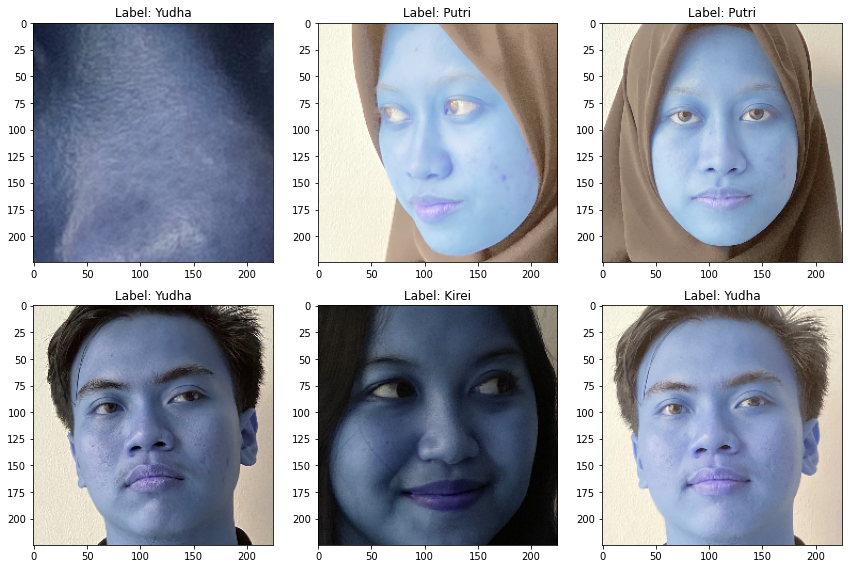

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select 6 indices from the data
random_indices = np.random.choice(len(X), 6, replace=False)

# Plot the images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[idx])
    plt.title("Label: " + str(y[idx]))
plt.tight_layout()
plt.show()

In [7]:
print(f"awal {X.shape}")

jml_data = X.shape[0]
h = X.shape[1]
w = X.shape[2]
d = X.shape[3]
flatten  = h*w*d
#untuk shape ML itu 1 dimensi jadi X 3 dimensi harus di reshape jadi 1dimensi
X_1d = X.reshape(jml_data, flatten)

print(f"akhir {X_1d.shape}")

awal (195, 225, 225, 3)
akhir (195, 151875)


# train test split data

<img src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split_W640.jpg" >

In [8]:
from sklearn.model_selection import train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_1d, label_numerik_array,test_size=0.20, stratify=y) 
#train size adalah persentase data test yang di-split dengan proporsi label yang sama

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))


X_train: (156, 151875)
X_test: (39, 151875)
y_train: (156,)
y_test: (39,)


# Klasifikasi KNN

<b>FLOW KLASIFIKASI</b><br>
<img src="TT.png">
<b>KNN</b><br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">
<hr>
<b>Metode evaluasi</b><br>
<img src="https://dataq.files.wordpress.com/2013/06/rumus.png">

### Train model terhadap beberapa data split

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski") #knn dengan nilai n ditentukan
model.fit(X_train,y_train) #pastikan model di "fit" = proses latih

KNeighborsClassifier()

# Visualisasi metric distance

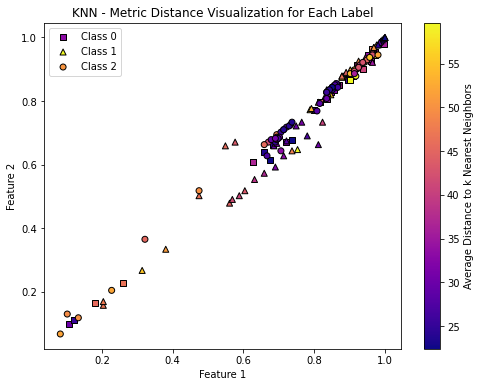

In [10]:
# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(8, 6))

# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}
# Get the distances to the k nearest neighbors for each data point
distances, _ = model.kneighbors(X_train)
for label in np.unique(y_train):
    # Get the indices of data points belonging to the current label
    label_indices = np.where(y_train == label)[0]
    
    # Get the distances to the k nearest neighbors for data points of the current label
    label_distances = np.mean(distances[label_indices], axis=1)
    
    # Plot the distances for the current label with the corresponding marker shape
    plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])

plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()

### Test model

In [11]:
y_pred = model.predict(X_test) #predict untuk memprediksi data test

# Evaluasi

## Confussion matrix

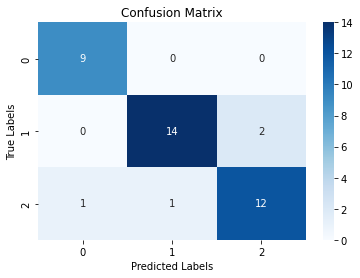

In [12]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Performance

In [13]:
print(classification_report(y_test, y_pred)) #evaluasi hasil

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.93      0.88      0.90        16
           2       0.86      0.86      0.86        14

    accuracy                           0.90        39
   macro avg       0.90      0.91      0.90        39
weighted avg       0.90      0.90      0.90        39



support: jumlah sampel di setiap kelas. 
Ini memberikan gambaran tentang seberapa seimbang dataset kita dan apakah terdapat kelas yang mungkin kurang terwakili dalam dataset.

macro avg: nilai rata-rata dari metrik evaluasi untuk setiap kelas. 
Rata-rata ini diperoleh dengan menghitung rata-rata aritmatika dari skor presisi, recall, dan f1-score dari setiap kelas, tanpa mempertimbangkan frekuensi setiap kelas. 
Metrik ini berguna untuk mengevaluasi performa model secara keseluruhan, terlepas dari seberapa seimbang atau tidak seimbang kelas-kelas pada dataset.

micro avg: nilai rata-rata dari metrik evaluasi di seluruh kelas, dengan mempertimbangkan jumlah contoh yang benar diklasifikasikan secara agregat. 
Dalam hal ini, mikro rata-rata memperlakukan setiap contoh sebagai satu unit, dan mempertimbangkan jumlah contoh yang benar diklasifikasikan sebagai satu keseluruhan. Metrik ini berguna untuk mengevaluasi performa model pada dataset yang tidak seimbang.

accuracy: rasio antara jumlah contoh yang diklasifikasikan dengan benar dan jumlah contoh keseluruhan.

precision: rasio antara jumlah contoh positif yang diklasifikasikan dengan benar dan jumlah contoh yang diklasifikasikan sebagai positif oleh model.

recall: rasio antara jumlah contoh positif yang diklasifikasikan dengan benar dan jumlah contoh yang sebenarnya positif dalam dataset.

f1-score: rata-rata harmonik dari presisi dan recall. Metrik ini menggabungkan kedua nilai untuk memberikan skor yang mencerminkan keseimbangan antara presisi dan recall.

### Uji testing data baru

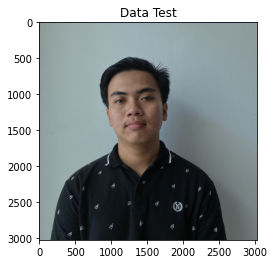

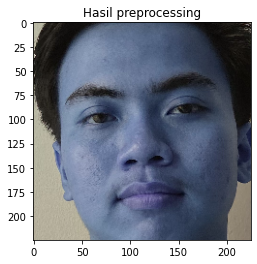

ukuran gambar test (151875,)
nilai probabilitas [[0. 0. 1.]]
Kirei = 0.0%
Putri = 0.0%
Yudha = 100.0%
prediksinya: ['Yudha']
The predicted image is : [2] -> ['Yudha']


In [14]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np

url= '../dataset/Yudha/IMG_4828.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Data Test")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#pastikan langkah preprocessing yang dilakukan sama dengan data train
status,haarnya=haar(img)
convert = haarnya/255.0
img_resize = cv2.resize(convert,(225,225))
#tampilkan hasil
plt.figure()
plt.title("Hasil preprocessing")
plt.imshow(img_resize)
plt.show()



test=[img_resize.flatten()] #makukan ke list
print(f"ukuran gambar test {img_resize.flatten().shape}") #sama dengan input shape

# Mengecek hasil klasifikasi pada salah satu dataset
probability=model.predict_proba(test)
print(f"nilai probabilitas {probability}") #tampilkan nilai probabilitas tiap kelas



for ind,val in enumerate(label_dict): #mendapatkan nama kelas dan hasil akurasi
    print(f'{val} = {probability[0][ind]*100}%')
    
    
hasil = np.argmax(probability, axis=-1) #mendapatkan kelas dari probabilitas terbaik
key_found = [key for key, value in label_dict.items() if value == hasil] #dapatkan namanya
print(f"prediksinya: {key_found}")
print(f"The predicted image is : {str(hasil)} -> {key_found}")

# Simpan model ML

In [15]:
import pickle
pickle.dump(model, open('model_haar_knn.pkl', 'wb')) #simpan dalam file.pkl
loaded_model = pickle.load(open('model_haar_knn.pkl', 'rb')) # load model yg dibuat

# result = loaded_model.predict(X_test) 
# print(classification_report(y_test, result)) #evaluasi hasil best model